# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Import Dataset yang digunakan

In [4]:
df = pd.read_excel('E Commerce Dataset.xlsx')

# 1. Descriptive Statistics

## `info()`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### Penjelasan info ()
1. Missing data terlihat pada kolom - kolom Tenure , WarehouseToHome , HourSpendOnApp , OrderAmountHikeFromlastYear,
CouponUsed , OrderCount, DaySinceLastOrder.

In [6]:
df.isna().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

Sampling untuk memahami data dengan `df.sample()`

In [7]:
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
534,50535,0,1.0,Phone,3,11.0,Credit Card,Male,3.0,3,Laptop & Accessory,2,Single,2,0,14.0,1.0,1.0,2.0,149.08
4514,54515,0,4.0,Computer,3,32.0,COD,Female,3.0,4,Laptop & Accessory,3,Married,9,1,13.0,3.0,3.0,3.0,172.36
2631,52632,0,13.0,Phone,1,8.0,Debit Card,Female,3.0,3,Mobile,5,Married,5,0,17.0,1.0,1.0,2.0,133.77
713,50714,1,5.0,Computer,3,18.0,Debit Card,Male,2.0,3,Grocery,5,Single,1,1,12.0,7.0,NaN,14.0,237.58
2123,52124,0,19.0,Phone,1,14.0,Debit Card,Female,3.0,4,Laptop & Accessory,5,Married,9,1,23.0,1.0,1.0,7.0,146.15


Pengelompokan berdasarkan tipe data `numerik` dan `kategorik`
Untuk memudahkan analisa describe.

In [8]:
num_dtypes = [ 'int64', 'float64']
num_df = df.select_dtypes(include=num_dtypes)
nums = num_df.columns
print("kolom tipe numerik =", nums)
string_dtypes = [ 'object']
string_df = df.select_dtypes(include=string_dtypes)
string_ = string_df.columns
print("kolom tipe katergorik = ", string_)

kolom tipe numerik = Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')
kolom tipe katergorik =  Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


In [9]:
#membagi data numerik kategorik berdasarkan tipe data di dataset. 
numerik = [  'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
kategorik = ['CustomerID', 'Churn', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus']

## describe ()

### a) `Describe numerik`

In [9]:
df[numerik].describe()

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


#### Penjelasan
Untuk Data Numerik (berdasarkan tipe data di dataset )
1. Missing data terlihat pada kolom - kolom Tenure (264) ,WarehouseToHome (251), HourSpendOnApp (255) OrderAmountHikeFromlastYear  (265) ,CouponUsed (256) , OrderCount, (258) DaySinceLastOrder (307)
2. `CustomerID` di data berupa angka integer terdiri dari 5 angka. Setiap baris mereperesentasikan satu customer (bernilai unik) Sehingga bisa saja kolom ini tidak akan dilakukan proses statistik lebih jauh.
3. `Churn` isinya terdiri dari 0 dan 1 kemungkinan perlu dilakukan feature encoding agar machine learning tidak mengganggap churn 0 < 1. 
4. Pada data `TENURE` memiliki nilai min dan max cukup jauh di banding nilai mean dan median .  tenure berisi rentang bulan (mungkin nanti bisa digunakan feature transformation)
5. `Citytier` nilai min dan mediannya bernilai  sama yaitu 1 dan nilai maxnya 3. Kemungkinan citytier ini termasuk kategorikal . 
6. `Complain` memiliki nilai min dan medianya 0 padahal nilai maksimalnya 1 yang kemungkinan kolom ini termasuk kategorikal.
7. `Hour Spend on ap`p memiliki nilai min 0, median 3, dan max 5. 
8. `Ware house to home` , CouponUsed, OrderCount, DaySinceLastOrder, CashbackAmount , memiliki nilai max yang jauh dengan median. kemungkinan ada outlier.
9. `Number of device registered`, `Number of address`  memiliki nilai mean dan median yang sedikit jauh kemungkinan ada outlier.
10. `SatisfactionScore` memiliki nilai  mean dan median tidak terlalu jauh dan karena kolom ini tentang pemberian rating jadi sifatnya bisa sebagai kategori dan numerik.


### b) `Describe Kategorik`

In [10]:
kategorikk = [ 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus']
df[kategorikk].describe()

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [11]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [12]:
df['CustomerID'].nunique()

5630

#### Penjelasan
Untuk Data Kategorik (berdasarkan tipe data di dataset )
1. Pada kolom `preferrend login device`, jumlah Modus paling banyak adalah mobile phone dimana frekuensinya terlalu timpang dengan 2 data lainnya dimana hampir setengah data yang dimiliki berisi mobile phone.
2. Pada kolom `PreferredPaymentMode`  penggunaan debit card memiliki frekuensi terlalu timpang dengan kategori lainnya.
3. `Gender` yang dominan adalah customer berjenis kelamin laki - laki dengan jumlah frekuensi 3384. 
4. `Prefered Order Cat` kategori laptop & accessory memiliki frekuensi terbesar yaitu 2050. 
5. `Marital Statu`s memiliki frekuensi hampir setengah data berisi married.


# 2. Univariate Analysis
Melihat distribusi masing - masing kolom

### a) ` Distribusi Data Numerik` (boxplot)

In [13]:
nums1 = [  'Tenure', 'CityTier', 'WarehouseToHome','HourSpendOnApp', 'NumberOfDeviceRegistered']
nums2 = ['SatisfactionScore','NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear','CouponUsed']
nums3 = ['OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

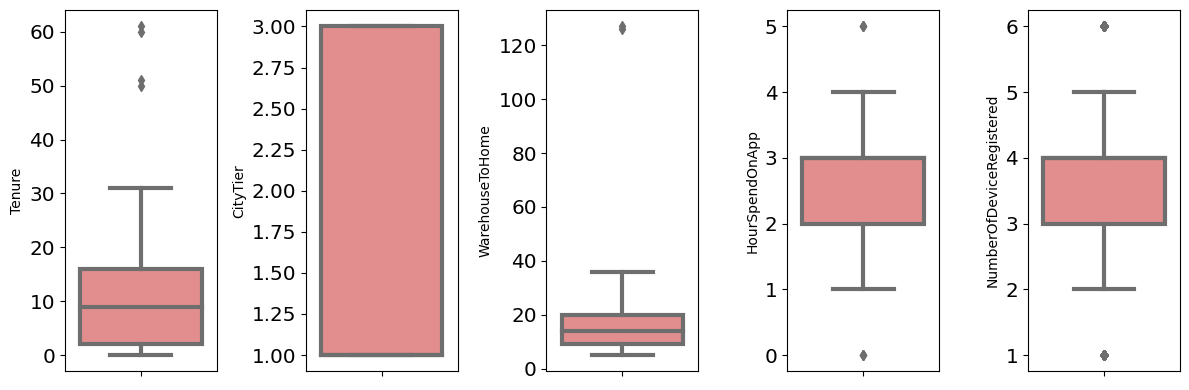

In [14]:
for i in range(0, len(nums1)):
    plt.subplot(1, len(nums1), i+1)
    sns.boxplot(y=df[nums1[i]], color='lightcoral', orient='v')
    plt.tight_layout()
    plt.savefig('Distribusi1')

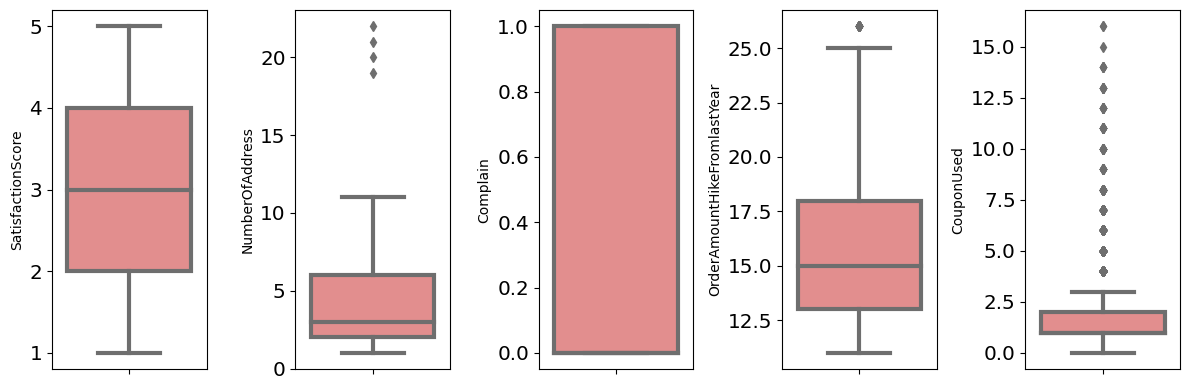

In [15]:
for i in range(0, len(nums2)):
    plt.subplot(1, len(nums2), i+1)
    sns.boxplot(y=df[nums2[i]], color='lightcoral', orient='v')
    plt.tight_layout()
    plt.savefig('Distribusi2')

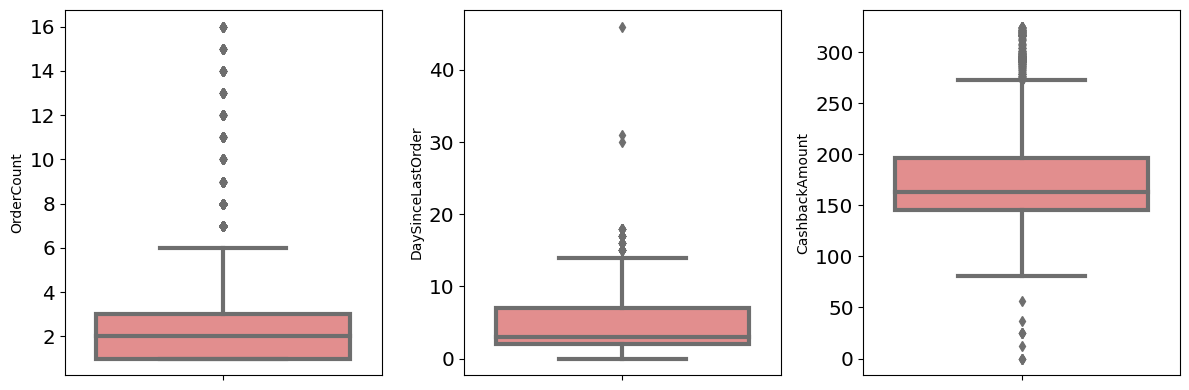

In [16]:
for i in range(0, len(nums3)):
    plt.subplot(1, len(nums3), i+1)
    sns.boxplot(y=df[nums3[i]], color='lightcoral', orient='v')
    plt.tight_layout()
    plt.savefig('Distribusi3')

#### Penjelasan :
1. Tenure memiliki rata - rata kurang dari 10 bulan dimana outlier berada di 45 - 60 lebih bulan.
2. CItytier memiliki distribusi dengan rentang 1 - 3 (kemungkinan data kategorikal)
3. Ware House To home memiliki data outlier sangat jauh di 120 km lebih dibanding dengan nilai Q3 nya di bawah 40 km
4. Hour spend on app memiliki data di 0 - 5 jam, dimana distribusi data banyak sekitar 1 - 4 jam dan outlier di 0 jam dan 5 jam.
5. Number of device registered memiliki outlier di 1 dan 6 kali dan kebanyakan distribusi data di 3-4 kali.
6. Satisfaction Score memiliki pesebaran sekitar 2-4 dan tidak memiliki outlier. Tipe data kolom ini termasuk ke kategorikal.Number of address terdapat outlier di rentang sekitar 18 - 25 . 
7. Complain memiliki grafik boxplot dengan bar penuh dan kolom ini merupakan kategorikal karena terdiri dari 0 dan 1.
8. Order Amount Hike Fromal as Year  terdapat customer outlier dimana lebih dari 25 persentase kenaikan orderan dari tahun lalu. 
9. Couponused kebanyakan menggunakan kupon di bawah 2 kali, terdapat outlier.
10. order count customer pada bulan lalu banyak melakukan pemesanan dibawah 4 kali pemesanan. Data ini juga memiliki outlier.
11. Day Since Last Order , customer melakukan pemesanan banyak di bawah 10 hari yang lalu. Beberapa customer juga melakukan pemesanan terakhir kali di 15 hari ke atas. Bahkan terdapat customer yang sudah tidak melakukan order lebih dari 40 hari 
12. cashback amount customer menggunakan cashback di sekitar 148 - 200 . Dalam penggunaan cashback terdapat juga customer yang 50 kebawah dan $270 lebih (outlier).

### b) Distrigusi data numerik (individual distplot)

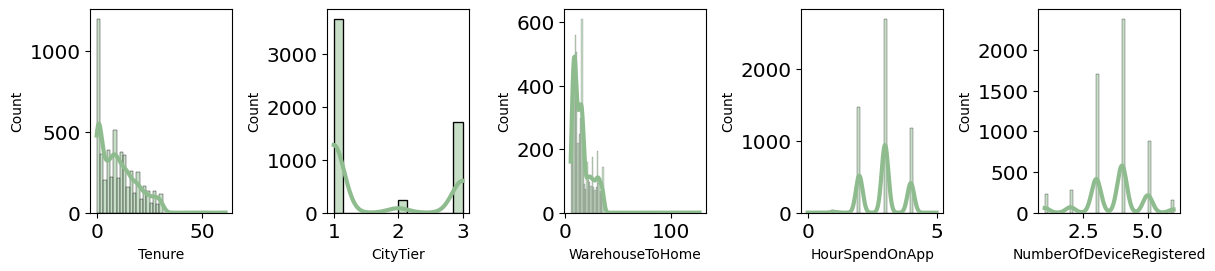

In [17]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums1)):
    plt.subplot(2, len(nums1), i+1)
    sns.histplot(df[nums1[i]], color='darkseagreen' ,  kde = True)
    plt.tight_layout()
    plt.savefig('distribusii1.png')

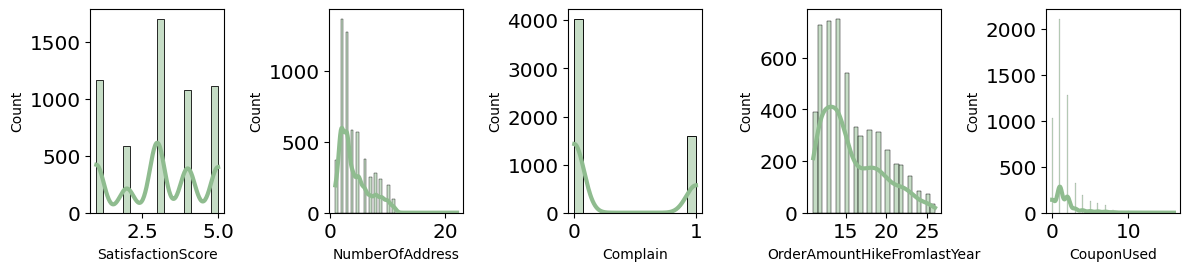

In [18]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums2)):
    plt.subplot(2, len(nums2), i+1)
    sns.histplot(df[nums2[i]], color='darkseagreen' ,  kde = True)
    plt.tight_layout()
plt.savefig('distribusii2.png')

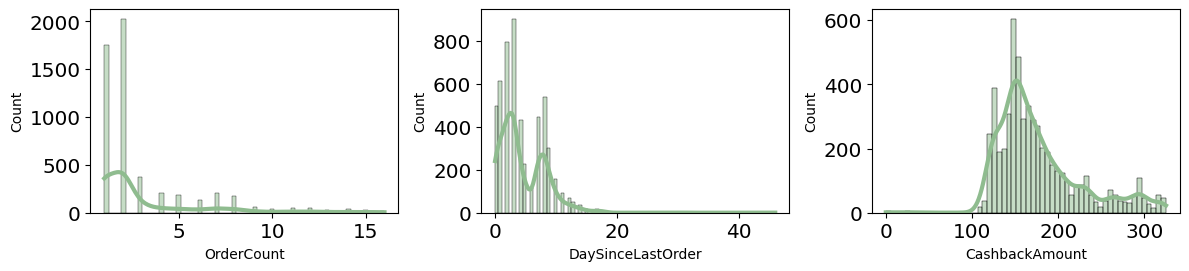

In [19]:
plt.figure(figsize=(12, 5))
for i in range(0, len(nums3)):
    plt.subplot(2, len(nums3), i+1)
    sns.histplot(df[nums3[i]], color='darkseagreen' , kde = True)
    plt.tight_layout()
plt.savefig('distribusii3.png')

#### Penjelasan:
1. Tenure dan Warehousetohome memiliki distribusi positive skewed yang berarti  mean > median ada outlier di data - data bernilai besar
2. Citytier dan complain memiliki hasil grafik biomodal yang menandakan kolom ini kategorikal.
3. Satisfactionscore memiliki distribusi biomodal, tapi jika dilihat dari kolomnya berisi rating yang diberikan customer dapat dilihat dari dua sudut pandang sebagai tipe data numerik dan kategorik
4. NumberOfAddress, OrderAmountHikeFromlastYear, dan CouponUsed memiliki distribusi positive skewed dan memiliki outlier khususnya terlihat sangat jelas garis lurus di data besar  pada CouponUsed dan numberOfAddress
5. Order Count memiliki banyak outlier.
6. DaySinceLastOrder positive skewed dan memiliki outlier yang banyak.
7. CashbackAmount memiliki distribusi positive skewed.

### c) Distribusi Data Kategorik

In [21]:
kategorik1 = [ 'Churn', 'PreferredLoginDevice', 'PreferredPaymentMode']
kategorik2 = ['Gender', 'PreferedOrderCat', 'MaritalStatus']
kategorik3 = ['Complain', 'CityTier', 'SatisfactionScore']

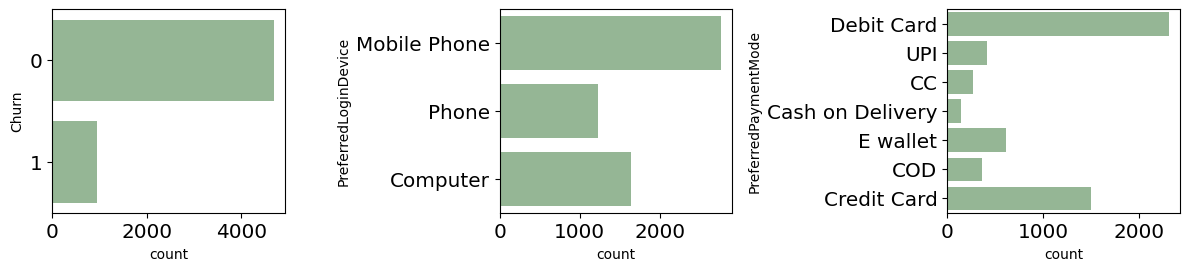

In [22]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik1)):
    plt.subplot(2, len(kategorik1), i+1)
    sns.countplot(y= kategorik1[i], data = df, color='darkseagreen' )
   
    plt.tight_layout()
    plt.savefig('kat1.png')

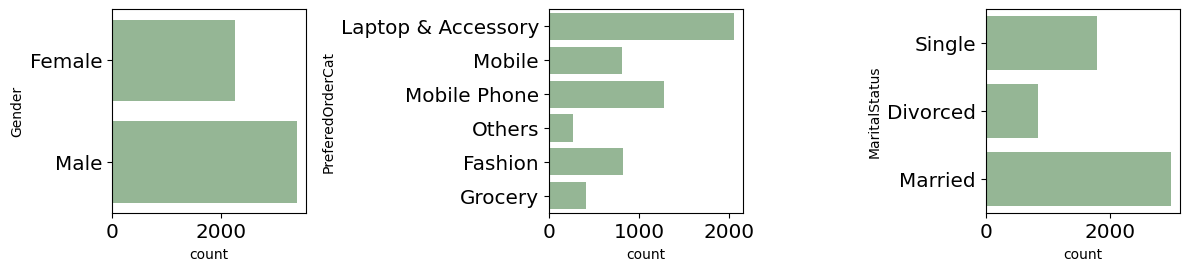

In [23]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik2)):
    plt.subplot(2, len(kategorik2), i+1)
    sns.countplot(y = kategorik2[i], data = df, color='darkseagreen' )
    plt.tight_layout()
    plt.savefig('kat2.png')

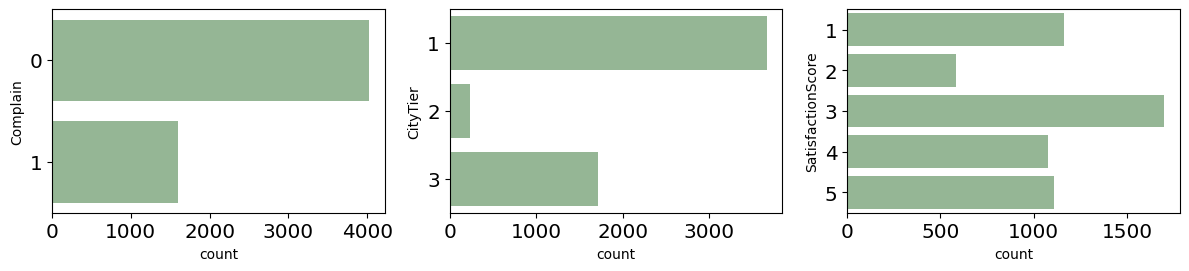

In [24]:
plt.figure(figsize=(12, 5))
for i in range(0, len(kategorik3)):
    plt.subplot(2, len(kategorik3), i+1)
    sns.countplot(y = kategorik3[i], data = df, color='darkseagreen' )
    plt.tight_layout()
    plt.savefig('kat3.png')

#### Penjelasan :
Dari setiap fitur di atas banyak kategori yang nilainya timpang / imbalance dengan kategori lainnya perlu di lakukan tindakan lanjut saat di preprocessing nantinya. 

# Insight Dari Descriptive Analysis dan Univariate Analysis
1. `Memisahkan kembali fitur numerik dan kategorik` karena pada saat analisa dilakukan terdapat beberapa kolom yang seharusnya masuk ke data kategorik. Dengan demikian memudahkan proses pre-processing. 
2. Berdasarkan distribusi histoghram, Kolom `Complain dan Citier` merupakan `kategorikal` jadi untuk  tahap selanjutnya dimasukan ke kelompok kategori.
3. Kolom `Statisfactionscore` yang merupakan kolom mengenai rating customer` dapat sebagai` data numerik dan kategorik sekaligus. Saat masuk ke pre-processing disesuaikan saja mau melihatnya di sudut pandang numerik atau kategorik.
4. Untuk `customer id` memiliki nilai unik  sejumlah dataset sehingga `tidak perlu dimasukan ke dalam fitur nantinya.`
5. Berdasarkan hasil distribusi boxplot dan histplot `banyak fitur yang bersifat positive skewed` dimana nilai mean > median yang berarti banyak outlier yang berada di nilai besar. Hal ini perlu di perhatikan lebih jauh ketika akan melakukan preprocessing bisa dengan melakukan  feature transformation (seperti : normalization, standardization, atau log transformation)
6. Berdasarkan analisa yang di lakukan pengelompokan `numerik  sebanyak 10 data` dan `kategorik 10 data`. Berikut pembagiannya:
* `Kolom Numerik` =  [  'Tenure', 'WarehouseToHome','HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',  'OrderAmountHikeFromlastYear’ CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount’]
* `Kolom Kategorik` =  ['PreferredLoginDevice', 'CityTier',  'Churn', 'PreferredPaymentMode', 'Gender', 'SatisfactionScore’,  'PreferedOrderCat', 'MaritalStatus', 'Complain’]  


In [25]:
# dibagi jadi data numerik terhadap churn dan data kategorik terhadap churn
numerik_ = [  'Tenure', 'Churn',  'WarehouseToHome','HourSpendOnApp', 'NumberOfDeviceRegistered', 
           'NumberOfAddress',  'OrderAmountHikeFromlastYear',
           'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

kategorik_ = ['CustomerID', 'PreferredLoginDevice', 'CityTier',  'Churn', 'PreferredPaymentMode', 'Gender', 'SatisfactionScore',
       'PreferedOrderCat', 'MaritalStatus', 'Complain']

# Multivariate Analysis

Berdasarkan hasil analisa descriptive statistic dan univariate analysis untuk memudahkan multivariate analysis kolom yang termasuk kategorik namun di dalam dataset numerik di kelompokan ulang kembali. 